<a href="https://colab.research.google.com/github/elygoner/SSN/blob/main/exercici_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MC Simulation two State system
------------------------------
Epsilon = Energy exited state

 Please enter kT/Epsilon (suggestion 0.5): 3

 Enter number of Monte Carlo (Metropolis) iterations (suggestion 100):100

 Enter number of degenerate states500
MC step= 0  Energy= 0.99853515625  M= 0.99560546875
Initial configuration:
[[550 268 624 ... 356 620 208]
 [ 66 370 506 ... 914 678 980]
 [902  14 278 ...  76 442 118]
 ...
 [846 758 742 ... 274 198 616]
 [966 868 410 ... 554 710   8]
 [496 646 534 ... 962 786 860]]


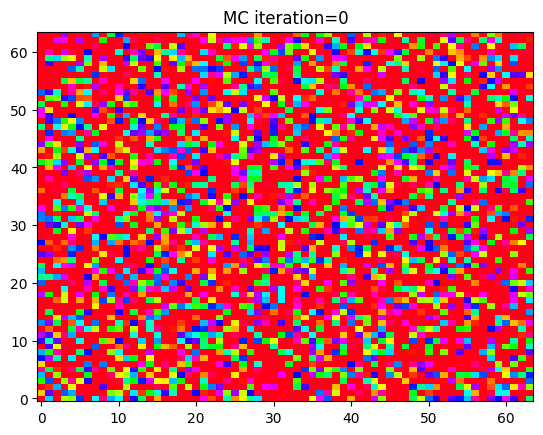

Starting MC simulation

MC step= 20  Energy= 0.998046875  M= 0.99609375
[[ 28 230  94 ... 434 467 181]
 [178 457 264 ... 275 363  64]
 [180  23 417 ... 117 320 299]
 ...
 [184 121 207 ... 276 384 465]
 [414 193  19 ... 433 389 101]
 [201 208   3 ... 491  62 314]]


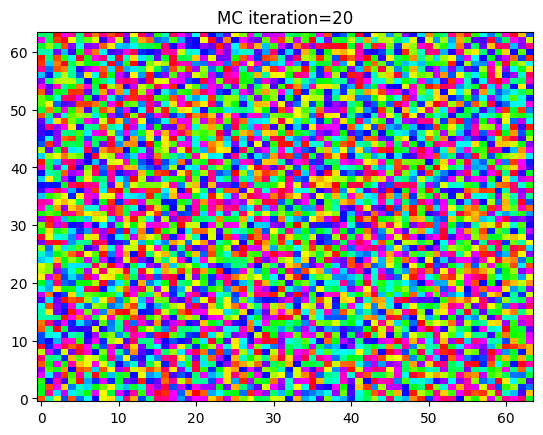


MC step= 40  Energy= 0.997314453125  M= 0.99462890625
[[165 259 489 ... 401 453  43]
 [ 27 268 236 ... 450 446 306]
 [278 140  12 ... 183 134 357]
 ...
 [483 356 463 ...  66 262 240]
 [238 172 142 ... 445 288 104]
 [224 490 113 ... 428  17  74]]


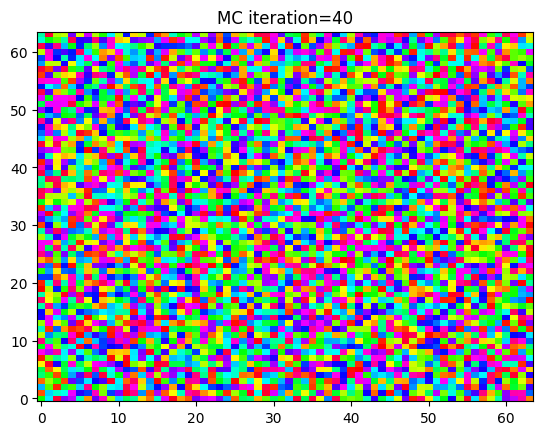


MC step= 60  Energy= 0.99853515625  M= 0.9970703125
[[ 40 246 104 ... 475  63 387]
 [304 464 161 ... 473 397 422]
 [  9  85 184 ... 318 498 291]
 ...
 [480 320 174 ... 259 291  30]
 [415 237  96 ... 280 182 421]
 [491 486 187 ...  92  62   0]]


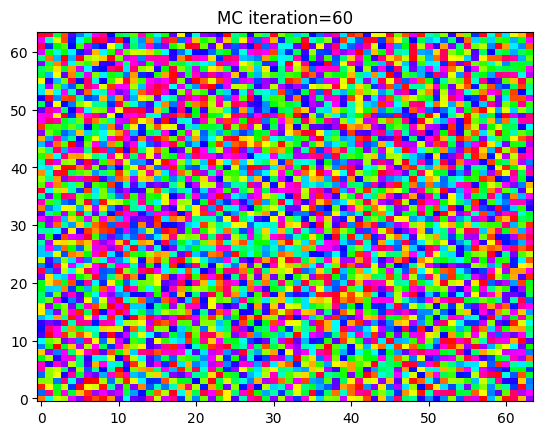


MC step= 80  Energy= 0.998291015625  M= 0.99658203125
[[ 67 369 300 ... 266  43 133]
 [312 469 198 ... 123 375 215]
 [156  24 128 ... 181 151 441]
 ...
 [283  13 145 ... 179 177   4]
 [317  28  80 ...  16  62 407]
 [305 171 477 ... 452 469  45]]


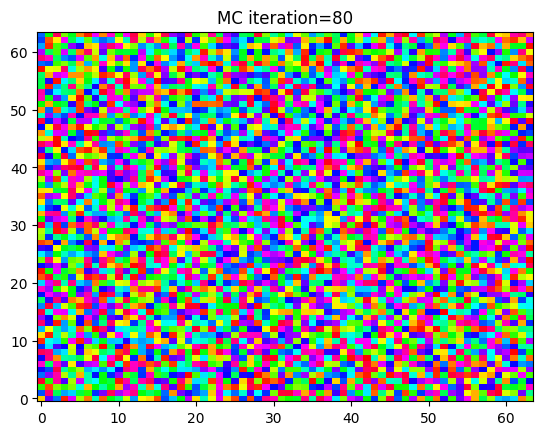


MC step= 100  Energy= 0.997314453125  M= 0.99462890625
[[231 195 420 ... 430 149 497]
 [ 22 212 455 ... 333 357  91]
 [423  66  10 ... 422 217 228]
 ...
 [ 49  89 361 ... 435 327 168]
 [419 357 120 ... 128 195   2]
 [ -1 389 243 ... 301 315 359]]


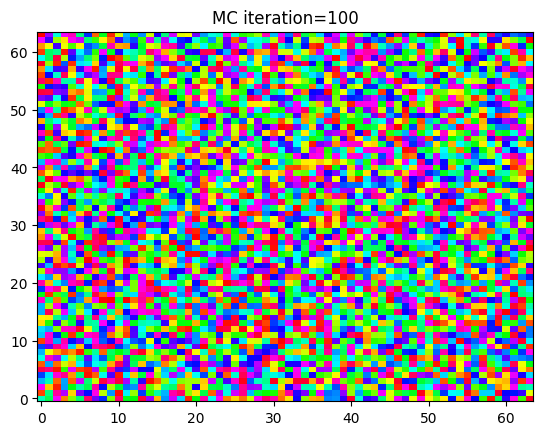


Simulation finished after 100 MC steps


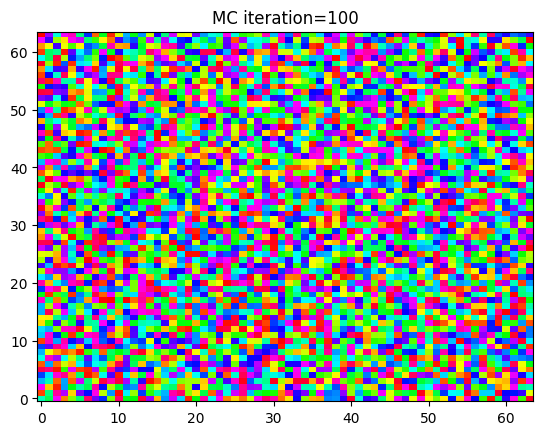

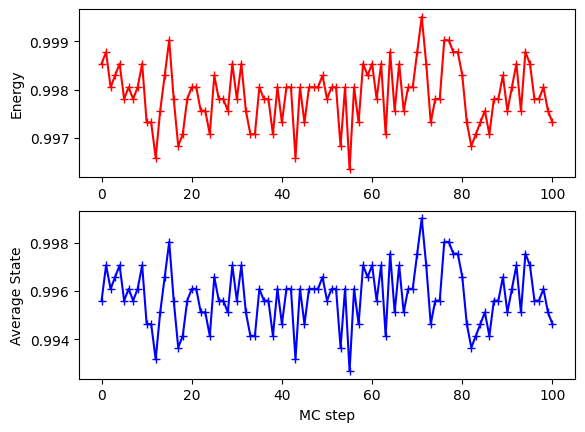

In [ ]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

####################################################
def mcmove(config, N, p, n):
        a=np.random.randint(0,N, size=(N*N))
        b=np.random.randint(0,N, size=(N*N))
        for i in range(len(a)):
          conf=config[a[i],b[i]]
          if conf>=0:
            while config[a[i],b[i]]==conf:
              num = np.random.randint(-1,n)
              if num != conf:
                config[a[i],b[i]] = num
          elif rand() < p:#Com hi han dos estats, la probabilitat de transició és p+(1-p)*p. El que he esscrit es equivalent
                config[a[i],b[i]] = np.random.randint(0,n)# si hi ha una transició randomitza entre 0 i 1 que es com he codificat els dos estats diiferents.
        return config
###################################################El fet de asociar el segon estat com a zero només canvia la gràfica, tot lo demés es equivalent a canviar la probabilitat.


def configPlot(f, config, i, N, n):
        ''' This modules plts the configuration '''
        X, Y = np.meshgrid(range(N), range(N))
        ####################################### he canviat vmax perque soporti els estats extra i canviat el cmap a hsv per la major diversitat de colors (groundstate es vermell)
        plt.pcolormesh(X, Y, config, vmin=-1.0, vmax=n, cmap='hsv');
        ############################################
        plt.title('MC iteration=%d'%i);
        plt.axis('tight')
        plt.pause(0.1)


#################################################Els canvis fets aquí simplement conten el 0 com un 1 i uso un format de loop més ràpid
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = np.sum([1 if i>=0 else 0 for i in config.flatten()])
    return energy


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum([1 if i>=0 else i for i in config.flatten()])
    return mag
################################################
#
# MAIN PROGRAM
#
N = 64
print("MC Simulation two State system")
print("------------------------------")
print("Epsilon = Energy exited state")
temp = float(input("\n Please enter kT/Epsilon (suggestion 0.5): "))
msrmnt = int(input("\n Enter number of Monte Carlo (Metropolis) iterations (suggestion 100):"))
n=int(input('\n Enter number of degenerate states'))

p=0
for m in range(1,n+1):
  p+=(1-p)*np.exp(-1/temp)
step=[]
M=[]
E=[]

############################## Els estats inicials inclouen 0.
config = 2*np.random.randint(-1,n, size=(N,N))
##############################


Ene = calcEnergy(config)/(N*N)
Mag = calcMag(config)/(N*N)
t=0
print('MC step=',t,' Energy=',Ene,' M=',Mag)
step.append(t)
E.append(Ene)
M.append(Mag)

print('Initial configuration:')
print(config)

f = plt.figure(dpi=100)
configPlot(f, config, 0, N, n)
plt.show()

print("Starting MC simulation")
plt.ion()

for i in range(msrmnt):
        mcmove(config, N, p, n)
        t+=1
        Ene = calcEnergy(config)/(N*N)
        Mag = calcMag(config)/(N*N)
        step.append(t)
        E.append(Ene)
        M.append(Mag)

        if t%20 == 0:
            print('\nMC step=',t,' Energy=',Ene,' M=',Mag)
            print(config)
            configPlot(f, config, t, N, n)

print('\nSimulation finished after',t, 'MC steps')

plt.ioff()

configPlot(f, config, t, N, n)
plt.show()

plt.subplot(2, 1, 1)
plt.plot(step, E, 'r+-')
plt.ylabel('Energy')

plt.subplot(2, 1, 2)
plt.plot(step, M, 'b+-')
plt.ylabel('Average State')
plt.xlabel('MC step')

plt.show()